# 📊 1.1 Introduction to Data Science Environments

Before we dive into data analysis, it’s important to understand the environment where our code runs.

In nutrition and food science, we often work with sensitive or large datasets. Having a reliable, reproducible setup — whether local or in the cloud — makes our work easier to share, debug, and scale.

---

### 🎯 Objectives

- Understand the difference between local and cloud-based environments
- Set up and test a core Python environment
- Ensure reproducibility for data science workflows

**Context**: A robust environment is essential for analysing datasets like NDNS or hippo-themed nutrient logs. 🦛

<details><summary>🦛</summary>
A good environment is like a hippo’s kitchen—organized and ready for action! 🦛
</details>

## 🧠 What is Data Science?

Data science is the process of transforming raw data into insights and decisions.  
It blends statistics, computer science, and domain knowledge — in our case, nutrition and health.

---

### 🔧 Core Components of Data Science

| Component        | What It Does                                      | Example in Nutrition                           |
|------------------|---------------------------------------------------|------------------------------------------------|
| **Data**         | Collect, clean, and organise information          | Survey results, NDNS, 24hr recalls             |
| **Statistics**   | Summarise, model, and test relationships          | Are protein levels linked to age or BMI?       |
| **Programming**  | Automate tasks, build tools, repeat analyses      | Clean hundreds of food logs efficiently        |
| **Visualisation**| Reveal patterns and communicate findings          | Plot sugar trends across age groups            |
| **Communication**| Tell a story with data                            | Make a compelling case for public policy       |
| **Reproducibility** | Make sure others (or future you!) can repeat your work | Share code + data = reliable science |

---

### 🧪 What Makes Data Science Special?

- It’s **iterative**: You don’t start with all the answers.
- It’s **exploratory**: You poke around to understand what’s going on.
- It’s **interdisciplinary**: You bring together tools, evidence, and context.
- It’s **powerful**: It helps uncover things that no single experiment ever could.

---

### 🦛 Hippo Example

Let’s say you have data from 100 hippos about their diets, weights, and energy intake.  
As a data scientist, you might ask:

- Are heavier hippos eating more calories?
- Which foods are linked to healthier weights?
- Is there a seasonal pattern to energy intake?

With data science, you can **find answers, visualise trends, and share insights** — all in a way that’s reproducible, testable, and scalable.

---

### ✅ Why Start With Environments?

Just like you need the right kitchen to bake a cake, you need the right environment to do data science.  
The rest of this notebook helps you create that space — so everything runs smoothly from here on.


## 📁 How Do We Access Data?

We typically load data in one of two ways:

- 🧳 **From the internet** – using GitHub to pull the same files used across the course

```{python}
# From GitHub
!git clone https://github.com/ggkuhnle/data-analysis-toolkit-FNS.git
```

- 📂 **Manual upload** – useful if you're testing something private or custom
```{python}
# Manual upload
from google.colab import files
uploaded = files.upload()
```


This next step tries to clone the full toolkit repository. If it fails, you’ll be asked to upload the file manually.


In [ ]:
# Setup for Google Colab: Fetch datasets automatically or manually
%run ../../bootstrap.py    # installs requirements + editable package

import fns_toolkit as fns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Environment ready.')

## Testing with Hippo Data

Load `hippo_diets.csv` to verify your setup and create a simple visualization.

In [ ]:
df = fns.get_dataset('hippo_diets.csv')

plt.scatter(df['Calories'], df['Protein'])
plt.xlabel('Calories')
plt.ylabel('Protein (g)')
plt.title('Hippo Diet: Calories vs. Protein')
plt.show()

## 🧪 Exercise 1: Explore Hippo Diets Visually

Let’s go one step further and learn something **useful** about the data!

Try one of the following (or both):

---

### 🔴 Option 1: Colour by Protein Intake  
Change the colour of the points in the scatter plot based on protein levels:

- Red for high protein (e.g. > 80g)
- Blue for low protein

This teaches you how to use conditional logic to **customise plots based on data**.

---

### 📊 Option 2: Plot a Histogram  
Create a histogram showing how many hippos eat at different calorie levels.

This helps you understand the **distribution** of a single variable.

---

### ✅ How to Do This in Colab?

You don’t need to install anything! Just write code in the cell below and run it with **Shift + Enter**.

Need a reminder?

- Use `df['Protein'] > 80` to filter high-protein hippos
- Use `plt.hist()` for histograms
- Use `plt.scatter(x, y, c=colours)` for colour-coded scatter plots


**Answer**:

I changed the marker color by...

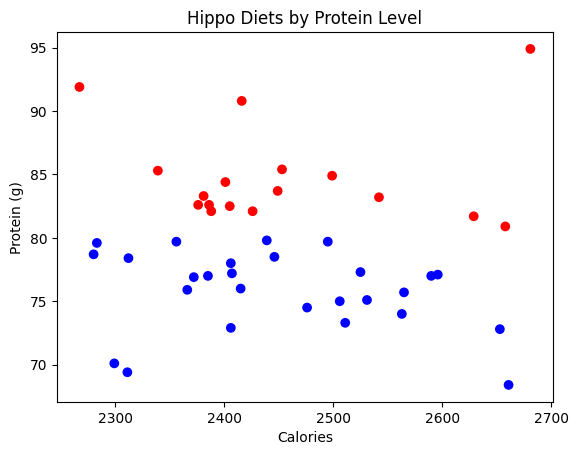

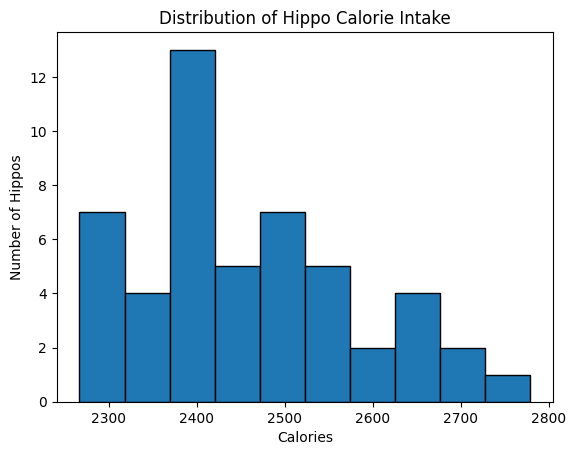

In [7]:
# OPTION 1: Colour points based on protein levels
colours = np.where(df['Protein'] > 80, 'red', 'blue')  # True = red, False = blue
plt.scatter(df['Calories'], df['Protein'], c=colours)
plt.xlabel('Calories')
plt.ylabel('Protein (g)')
plt.title('Hippo Diets by Protein Level')
plt.show()

# OPTION 2: Plot histogram of Calories
plt.hist(df['Calories'], bins=10, edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Number of Hippos')
plt.title('Distribution of Hippo Calorie Intake')
plt.show()


🌟 Bonus: add a trend‐line (np.polyfit) to the scatter plot.



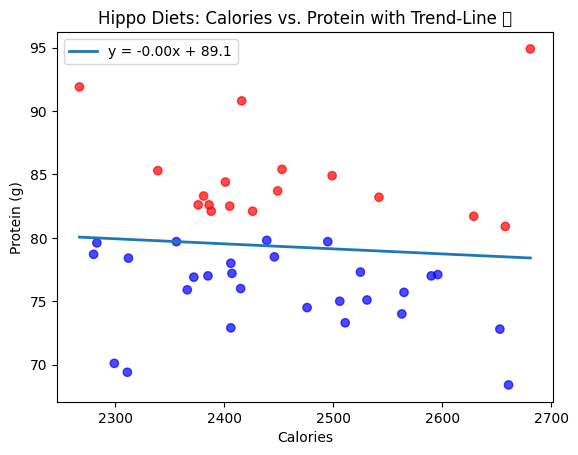

In [9]:
# 1. Grab your raw arrays
x = df['Calories'].values
y = df['Protein'].values

# 2. Mask out any NaNs or infs
mask = np.isfinite(x) & np.isfinite(y)
x_clean = x[mask]
y_clean = y[mask]

# 3. Fit the line on the clean data
coeffs = np.polyfit(x_clean, y_clean, deg=1)    # [slope, intercept]
poly   = np.poly1d(coeffs)

# 4. Prepare a smooth x-vector for plotting the trend-line
x_line = np.linspace(x_clean.min(), x_clean.max(), 100)

# 5. Plot!
colors = np.where(y_clean > 80, 'red', 'blue')
plt.scatter(x_clean, y_clean, c=colors, alpha=0.7)
plt.plot(x_line, poly(x_line), lw=2,
         label=f'y = {coeffs[0]:.2f}x + {coeffs[1]:.1f}')
plt.xlabel('Calories')
plt.ylabel('Protein (g)')
plt.title('Hippo Diets: Calories vs. Protein with Trend-Line 📈')
plt.legend()
plt.show()

## ✅ Conclusion

🎉 You’ve successfully set up a working Python environment in the cloud and tested your first dataset.

This setup ensures that:

- Your tools work correctly
- You can access shared data
- You're ready to explore real questions in nutrition science

---

### 📘 Next Steps

Proceed to **Notebook 1.2** to compare **Python vs. R** and understand why this toolkit focuses on Python.

---

### 📚 Additional Resources

- [Jupyter Documentation](https://jupyter.org/)
- [Google Colab Docs](https://colab.research.google.com/)
- [Course Repository on GitHub](https://github.com/ggkuhnle/data-analysis-toolkit-FNS)
